Included in the R&R

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

# import numpy as np
# import scipy.stats as st
import pandas as pd
import os
import glob
import json
from simsom.utils import *

# # Styling
plt.style.use("main_stylesheet.mplstyle")
# purple, orange, yellow, pink, blue, cyan
PALETTE = [
    "#550F6B",
    "#F18447",
    "#F8D625",
    "#BC3684",
    "#3863AC",
    "#209B8A",
]

In [23]:
# Directory containing experiment results
RES_DIR = "/N/u/baotruon/BigRed200/simsom/tests/20240422_quality_timestep/results"
fpaths = glob.glob(f"{RES_DIR}/results_*.json")
data = []
for idx, fpath in enumerate(fpaths):
    fname = os.path.basename(fpath)
    results = json.load(
        open(
            fpath,
            "r",
        )
    )

    res_dict = {
        "fname": fname,
        "max_steps": len(results["quality_timestep"]),
        "rhoepsilon_steps": results["converged_rhoepsilon_timestep"],
        "900th step": results["quality_timestep"][-1],
        "converged by rho-epsilon": results["quality_timestep"][
            results["converged_rhoepsilon_timestep"]
        ],
    }
    data += [res_dict]
df = pd.DataFrame.from_records(data)

In [24]:
df["index"] = df.index

In [25]:
df.head()

,fname,max_steps,rhoepsilon_steps,900th step,converged by rho-epsilon,index
0,results_22.json,394,215,0.722167,0.766561,0
1,results_16.json,917,755,0.738226,0.750879,1
2,results_26.json,434,385,0.747753,0.747108,2
3,results_11.json,912,879,0.736150,0.725807,3
4,results_8.json,600,563,0.757488,0.761650,4


In [26]:
df = df.rename(columns={'converged by rho-epsilon': 'Convergence criterion', '900th step': '900 steps'})

In [27]:
# assuming df is your DataFrame
df_melted = df.melt(
    id_vars=["max_steps", "rhoepsilon_steps", "index"],
    value_vars=["900 steps", "Convergence criterion"],
    var_name="type",
    value_name="quality",
)

In [28]:
df_melted.head()

,max_steps,rhoepsilon_steps,index,type,quality
0,394,215,0,900 steps,0.722167
1,917,755,1,900 steps,0.738226
2,434,385,2,900 steps,0.747753
3,912,879,3,900 steps,0.736150
4,600,563,4,900 steps,0.757488


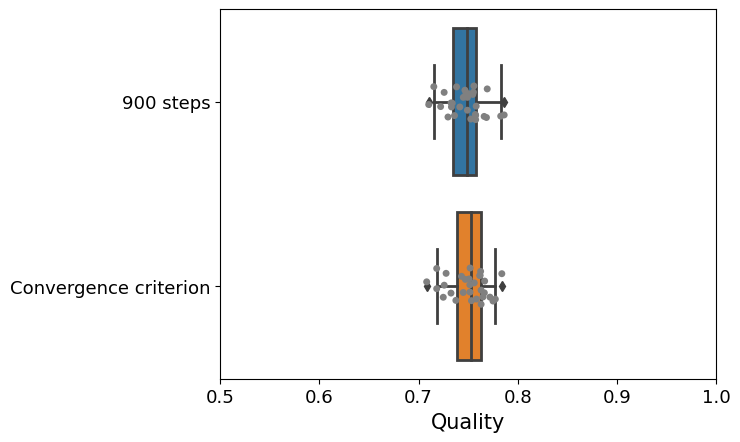

In [33]:
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

ax = sns.boxplot(data=df_melted, x="quality", y="type", whis=(2.5, 97.5))
sns.stripplot(data=df_melted, x="quality", y="type", dodge=True, ax=ax, s=5, color="grey", clip_on=True)
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
#           labels=['Smoker', 'Non-smoker'],
#           loc='upper left', handlelength=4,
#           handler_map={tuple: HandlerTuple(ndivide=None)})
ax.set_ylabel("")  # This line disables the y-label
ax.set_xlabel("Quality")
plt.xlim(0.5, 1)
plt.savefig("box_strip_plot_95ci_clip.png", dpi=300, bbox_inches="tight")

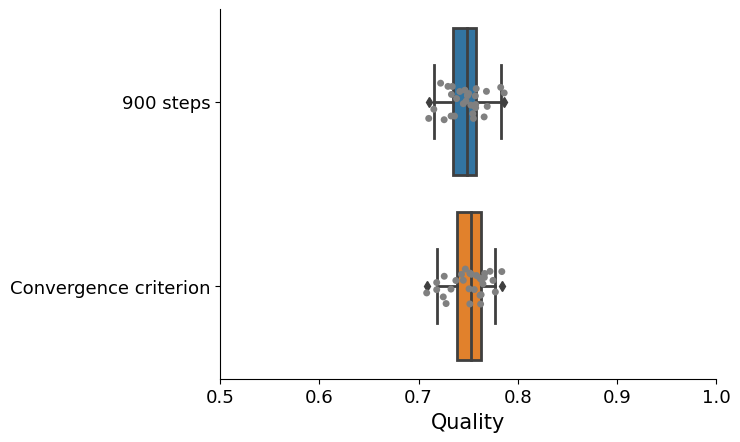

In [34]:
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

ax = sns.boxplot(data=df_melted, x="quality", y="type", whis=(2.5, 97.5))
sns.stripplot(data=df_melted, x="quality", y="type", dodge=True, ax=ax, s=5, color="grey")
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
#           labels=['Smoker', 'Non-smoker'],
#           loc='upper left', handlelength=4,
#           handler_map={tuple: HandlerTuple(ndivide=None)})
ax.set_ylabel("")  # This line disables the y-label
ax.set_xlabel("Quality")
plt.xlim(0.5, 1)
# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig("box_strip_plot_95ci.png", dpi=300, bbox_inches="tight")

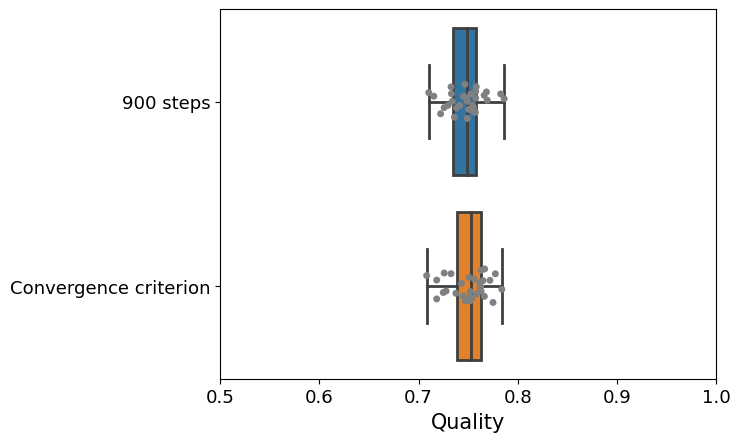

In [29]:
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple

ax = sns.boxplot(data=df_melted, x="quality", y="type")
sns.stripplot(data=df_melted, x="quality", y="type", dodge=True, ax=ax, s=5, color="grey")
handles, labels = ax.get_legend_handles_labels()
# ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
#           labels=['Smoker', 'Non-smoker'],
#           loc='upper left', handlelength=4,
#           handler_map={tuple: HandlerTuple(ndivide=None)})
ax.set_ylabel("")  # This line disables the y-label
ax.set_xlabel("Quality")
plt.xlim(0.5, 1)
plt.savefig("box_strip_plot.png", dpi=300, bbox_inches="tight")